##Objective:
 To build a multilabel text(NLP) classifier to determine the author's labels of the blog.

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
%matplotlib inline
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
blog = pd.read_csv('/content/drive/MyDrive/Dataset - blogtext.csv')

In [ ]:
blog.shape

(681284, 7)

In [ ]:
blog.head(10)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...
5,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",I had an interesting conversation...
6,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Somehow Coca-Cola has a way of su...
7,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004","If anything, Korea is a country o..."
8,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Take a read of this news article ...
9,3581210,male,33,InvestmentBanking,Aquarius,"09,June,2004",I surf the English news sites a l...


In [ ]:
blog['age'].value_counts()

17    80859
24    80071
23    72889
16    72708
25    67051
26    55312
27    46124
15    41767
14    27400
34    21347
33    17584
35    17462
36    14229
13    13133
37     9317
38     7545
39     5556
40     5016
45     4482
43     4230
41     3738
48     3572
42     2908
46     2733
47     2207
44     2044
Name: age, dtype: int64

In [ ]:
blog['topic'].unique()

array(['Student', 'InvestmentBanking', 'indUnk', 'Non-Profit', 'Banking',
       'Education', 'Engineering', 'Science', 'Communications-Media',
       'BusinessServices', 'Sports-Recreation', 'Arts', 'Internet',
       'Museums-Libraries', 'Accounting', 'Technology', 'Law',
       'Consulting', 'Automotive', 'Religion', 'Fashion', 'Publishing',
       'Marketing', 'LawEnforcement-Security', 'HumanResources',
       'Telecommunications', 'Military', 'Government', 'Transportation',
       'Architecture', 'Advertising', 'Agriculture', 'Biotech',
       'RealEstate', 'Manufacturing', 'Construction', 'Chemicals',
       'Maritime', 'Tourism', 'Environment'], dtype=object)

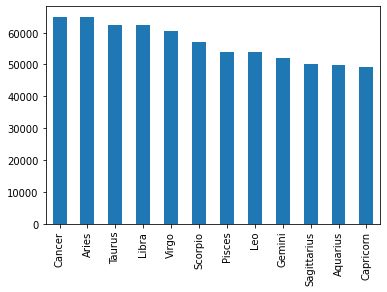

In [ ]:
blog['sign'].value_counts().plot(kind='bar')

In [ ]:
blog.isnull().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

In [ ]:
## Converting the age column into age_group column with three groups(10s,20s,30s) as mentioned the given problem statement.
blog['age_group'] = blog['age'].apply(lambda x: '30s' if x>28 else ('10s' if x<20 else '20s'))

In [ ]:
blog['age_group'].value_counts()

20s    321447
10s    235867
30s    123970
Name: age_group, dtype: int64

In [ ]:
blog.drop('age',axis=1, inplace= True)## dropping the age column

In [ ]:
blog.head()

,id,gender,topic,sign,date,text,age_group
0,2059027,male,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,...",10s
1,2059027,male,Student,Leo,"13,May,2004",These are the team members: Drewe...,10s
2,2059027,male,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...,10s
3,2059027,male,Student,Leo,"12,May,2004",testing!!! testing!!!,10s
4,3581210,male,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,30s


In [ ]:
blog['len'] = blog['text'].apply(lambda x: len(x.split())) ## calculating the length of each row

In [ ]:
ind = blog[blog['len']==0].index

In [ ]:
blog.drop(index = ind, axis=0, inplace =True)

**Tried using the full dataset but unsuccessul. Tried with 3lakh, 2lakh, and 1 lakh rows but still had hard time in training the model. Either the system is crashing or it is running more than a day for training. Hence, proceeding with subset of 50k rows.**

In [ ]:
blod_df = pd.DataFrame()

In [ ]:
blog_df = blog.sample(50000,random_state=4).reset_index(drop=True)

In [ ]:
blog_df.head()

,id,gender,topic,sign,date,text,age_group,len
0,3354828,male,Internet,Gemini,"19,May,2004","Ahh yes, Halle's new movie. ...",10s,46
1,755231,male,Student,Aries,"30,September,2003",GRAR GRAR GRAR,10s,3
2,3420072,male,Student,Libra,"22,May,2004",Ive had some time now to think about wh...,10s,286
3,1325355,female,indUnk,Cancer,"02,September,2003",urlLink MacInTouch Home Page: Appl...,20s,61
4,3429409,female,indUnk,Pisces,"11,June,2004",she was suffering this morning. I go...,30s,71


In [ ]:
blog_df.dtypes

id            int64
gender       object
topic        object
sign         object
date         object
text         object
age_group    object
len           int64
dtype: object

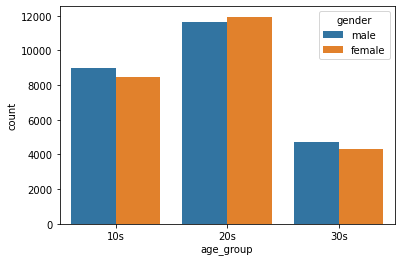

In [ ]:
sns.countplot(x= 'age_group',data=blog_df,hue='gender')

In [ ]:
blog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         50000 non-null  int64 
 1   gender     50000 non-null  object
 2   topic      50000 non-null  object
 3   sign       50000 non-null  object
 4   date       50000 non-null  object
 5   text       50000 non-null  object
 6   age_group  50000 non-null  object
 7   len        50000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 3.1+ MB


In [ ]:
blog_df.topic.unique()

array(['Internet', 'Student', 'indUnk', 'Law', 'Technology',
       'Architecture', 'Science', 'Engineering', 'Education',
       'Publishing', 'Fashion', 'RealEstate', 'Communications-Media',
       'Arts', 'LawEnforcement-Security', 'Government',
       'BusinessServices', 'Non-Profit', 'Accounting', 'Biotech',
       'Manufacturing', 'Chemicals', 'Construction', 'Military',
       'Sports-Recreation', 'InvestmentBanking', 'HumanResources',
       'Telecommunications', 'Marketing', 'Advertising', 'Transportation',
       'Consulting', 'Museums-Libraries', 'Environment', 'Religion',
       'Banking', 'Tourism', 'Automotive', 'Agriculture', 'Maritime'],
      dtype=object)

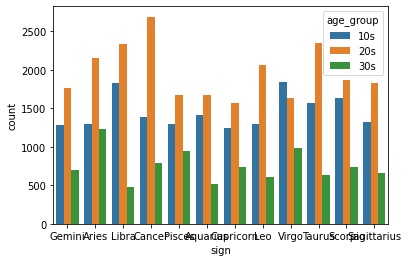

In [ ]:
sns.countplot(x='sign',data=blog_df,hue='age_group')

In [ ]:
## removing unnecessary columns which are blogger id, date:

blog_df.drop(['id','date'],axis=1,inplace=True)

In [ ]:
blog_df.dtypes

gender       object
topic        object
sign         object
text         object
age_group    object
len           int64
dtype: object

In [ ]:
print (blog_df["text"][0:10])

0                      Ahh yes, Halle's new movie. ...
1                           GRAR GRAR GRAR            
2           Ive had some time now to think about wh...
3                urlLink MacInTouch Home Page: Appl...
4           she was suffering this morning.    I go...
5                     First of all, a very very big...
6           You may have noticed that my posting he...
7               omg you guys..its *9 mOnThS* for Kc...
8                                ouch my head         
9           ok, so we are getting close to cayle's ...
Name: text, dtype: object


In [ ]:
print(blog_df['text'][17463])

       It is nice to be able to do things around the house again.  Kathy and I both need to get back into the swing of working on this place.  She travels tomorrow to get Adnan from Houston, along with his friend, Anke.  They will all go to College Station, TX to visit A&M, and then Kathy will take Anke back to Houston on Friday and the family will be back together.  I get to stay home and work.  I have done more cooking on the grill this last week than I di last year combined.  I am getting fairly good at shrimp, burgers, and brats.  I want to try fish, and I need more practice on steaks.         


In [ ]:
blog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   gender     50000 non-null  object
 1   topic      50000 non-null  object
 2   sign       50000 non-null  object
 3   text       50000 non-null  object
 4   age_group  50000 non-null  object
 5   len        50000 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 2.3+ MB


##Text Processing and wrangling.

Preparing text involves several techniques:
 
 1) Removing HTML & Markup tags.
 
 2) Handling accented charaters.
 
 3) Expanding contractions.
 
 4) Removing special characters & symbols
 
 5) Spelling mistakes.
 
 6) Stemming and Lemmatization.
 
 7) Removing stopwords.

 8) Lower casing


**Removing HTML & Markup tags**

There are no html tags found in the given corpus. But there are urllinks availalbe and in problem descritption it was 
mentioned, the website link present within a post were denoted by label urlLink. 

In [ ]:
import re
from bs4 import BeautifulSoup

In [ ]:
blog_df['text'] = blog_df['text'].apply(lambda x: BeautifulSoup(x).get_text()) ## remove html markups

In [ ]:
blog_df['text'] = blog_df['text'].apply(lambda x: re.sub(r'https?:\/\/.\S+', " ",x)) ## removes the http: links

In [ ]:
print(blog_df['text'][2])

Ive had some time now to think about what to write and i've come to the conclusion things come out better if you just write what you are feeling at the time. I mean its not as though thinking about something is not worth doing but it doesnt come off as fresh an idea as one that you just think of at like just this second.   Emotions: what are they to me emotions and the way you feel are intertwined but completely differnt i mean you could feel bad has hell but you could be on top of the world emotion wise. to me emotions are a myth it is just some word on how you should feel at a particular feeling you have which i think is poppycock. i know i could be wroung but hey i'm open for sudgestions.   if i were to start my blog from scrath i think i would have to stucture it so it was user friendly but hey i dont really care how i come off to people i mean i'm not a talented writer so i can do big words like because i mean who really like to use the word because any way its a crap word.  so i 

In [ ]:
blog_df['text']= blog_df['text'].apply(lambda x: re.sub(r"\b[^\s]+@[^\s]+[.][^\s]+\b", " ",x)) ## removing email id's

In [ ]:
print(blog_df['text'][2])

Ive had some time now to think about what to write and i've come to the conclusion things come out better if you just write what you are feeling at the time. I mean its not as though thinking about something is not worth doing but it doesnt come off as fresh an idea as one that you just think of at like just this second.   Emotions: what are they to me emotions and the way you feel are intertwined but completely differnt i mean you could feel bad has hell but you could be on top of the world emotion wise. to me emotions are a myth it is just some word on how you should feel at a particular feeling you have which i think is poppycock. i know i could be wroung but hey i'm open for sudgestions.   if i were to start my blog from scrath i think i would have to stucture it so it was user friendly but hey i dont really care how i come off to people i mean i'm not a talented writer so i can do big words like because i mean who really like to use the word because any way its a crap word.  so i 

It removed all the http hyperlink however there are few other email id's & website link present in the data

In [ ]:
blog_df['text'] = blog_df['text'].replace('urlLink',' ',regex=True) ## removing the word urlLink

In [ ]:
blog_df[blog_df['text']=='urlLink']

,gender,topic,sign,text,age_group,len


In [ ]:
blog_df['text'] = blog_df['text'].apply(lambda x: re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", x))

**Converting to LowerCase**

In [ ]:
blog_df['text'] = blog_df['text'].apply(lambda x: str(x).lower())

In [ ]:
print(blog_df['text'][2])

ive had some time now to think about what to write and i've come to the conclusion things come out better if you just write what you are feeling at the time. i mean its not as though thinking about something is not worth doing but it doesnt come off as fresh an idea as one that you just think of at like just this second.   emotions: what are they to me emotions and the way you feel are intertwined but completely differnt i mean you could feel bad has hell but you could be on top of the world emotion wise. to me emotions are a myth it is just some word on how you should feel at a particular feeling you have which i think is poppycock. i know i could be wroung but hey i'm open for sudgestions.   if i were to start my blog from scrath i think i would have to stucture it so it was user friendly but hey i dont really care how i come off to people i mean i'm not a talented writer so i can do big words like because i mean who really like to use the word because any way its a crap word.  so i 

**Removing the special characters & symbols & numbers**

Removing all the special characters and symbols as this will create lot of dimension

In [ ]:
blog_df['text'] = blog_df['text'].replace('[^\w\s]',' ',regex= True)

In [ ]:
blog_df['text'] = blog_df['text'].apply(lambda x: re.sub("[^a-zA-Z]"," ",x))

In [ ]:
print(blog_df['text'][3])

  macintouch home page  apple macintosh news  information and analysis    apple documents an odd open firmware password problem in a new knowledge base article   if you used open firmware password utility to create a password that contains the capital letter  u   your password will not be recognized during the startup process  when you try to access startup manager  for example             


In [ ]:
print(blog_df['text'][6])

you may have noticed that my posting here has slowed down quite a bit      frankly  i m disheartened by the tone i see on so many catholic blogs      i ve quit reading several  and my blogroll is shrinking rapidly      i feel lost out here in st  blogs   lost and lonely      i was going to write a big post about my feelings about the entire thing  but i just went over to    mark s site and found that he is feeling the same things  and saying exactly what i wanted to say        


**Removing unwanted white space**

In [ ]:
blog_df['text']=  blog_df['text'].str.replace('\s+',' ',regex = True)

In [ ]:
print(blog_df['text'][6])

you may have noticed that my posting here has slowed down quite a bit frankly i m disheartened by the tone i see on so many catholic blogs i ve quit reading several and my blogroll is shrinking rapidly i feel lost out here in st blogs lost and lonely i was going to write a big post about my feelings about the entire thing but i just went over to mark s site and found that he is feeling the same things and saying exactly what i wanted to say 


In [ ]:
print(blog_df['text'][6])

you may have noticed that my posting here has slowed down quite a bit frankly i m disheartened by the tone i see on so many catholic blogs i ve quit reading several and my blogroll is shrinking rapidly i feel lost out here in st blogs lost and lonely i was going to write a big post about my feelings about the entire thing but i just went over to mark s site and found that he is feeling the same things and saying exactly what i wanted to say 


**Removing short forms**

In [ ]:
def short_form(text):
  text = re.sub(r"what's", "what is ", text)
  text = re.sub(r"\'s", " ", text)
  text = re.sub(r"\'ve", " have ", text)
  text = re.sub(r"can't", "can not ", text)
  text = re.sub(r"n't", " not ", text)
  text = re.sub(r"i'm", "i am ", text)
  text = re.sub(r"\'re", " are ", text)
  text = re.sub(r"\'d", " would ", text)
  text = re.sub(r"\'ll", " will ", text)
  text = re.sub(r"youll", " you will ", text)
  text = re.sub(r"theyll", " they will ", text)
  text = re.sub(r"youve", " you have ", text)
  text = re.sub(r"youre", "you are", text)
  text = re.sub(r"theyve", " they have ", text)
  text = re.sub(r"cant", "can not ", text)
  text = re.sub(r"ohh", " ", text)
  text = re.sub(r"ahh", " ", text)
  text = re.sub(r"ahhh", " ", text)
  text = re.sub(r"yup", "yes", text)
  text = re.sub(r"yep", "yes", text)
  text = re.sub(r"didnt", "did not ", text)
  text = re.sub(r"btw","by the way",text)
  text = re.sub(r"sooo","so",text)
  text = re.sub(r"ppl","people",text)
  text = re.sub(r"wtf","What the fuck",text)
  text = re.sub(r"zzz", " ", text)
  text = re.sub(r"aaa", " ", text)
  text = re.sub(r"abt", "about ", text)
  return text

In [ ]:
blog_df['text'] = blog_df['text'].apply(lambda x: short_form(x))

In [ ]:
##blog_df['text'] = blog_df['text'].str.replace('ah',' ', regex = True)

In [ ]:
blog_df.head()

,gender,topic,sign,text,age_group,len,target
0,male,Internet,Gemini,yes halle new movie much say side thought woma...,10s,46,"[male, 10s, Internet, Gemini]"
1,male,Student,Aries,grar grar grar,10s,3,"[male, 10s, Student, Aries]"
2,male,Student,Libra,ive time think write come conclusion thing com...,10s,286,"[male, 10s, Student, Libra]"
3,female,indUnk,Cancer,macintouch home page apeoplee macintosh news i...,20s,61,"[female, 20s, indUnk, Cancer]"
4,female,indUnk,Pisces,suffering morning got early made fry even smel...,30s,71,"[female, 30s, indUnk, Pisces]"


**Removing stop words**

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stopw = set(stopwords.words('english'))

In [ ]:
print(stopw)

{'them', 'again', 'any', 'my', 'doing', 'during', 'once', 'some', 'has', "shouldn't", 'she', 'through', 'before', 'no', "couldn't", 'not', 'him', 'because', 'are', 'mustn', "weren't", 'those', 'about', "should've", 'her', 'their', 'of', 'such', 've', 'hadn', 'hasn', 'where', 'is', 'against', "hadn't", 'you', 's', 'yourself', 'wouldn', 'until', 'more', 'own', 'below', 'in', 'been', 't', 'nor', 'out', 'or', 'very', 'aren', 'ain', 're', 'as', "that'll", 'there', 'theirs', 'was', 'y', 'shouldn', 'on', 'will', 'whom', 'at', 'into', 'why', 'who', 'how', 'and', 'myself', "doesn't", 'isn', 'only', 'themselves', 'off', 'we', 'with', 'won', 'too', 'by', "needn't", "aren't", 'ours', 'a', 'he', "don't", "isn't", 'over', "you'll", 'so', 'its', 'which', 'now', 'but', 'other', 'mightn', 'haven', 'i', "wouldn't", 'had', 'each', 'm', 'can', 'herself', 'do', 'himself', "shan't", 'from', 'while', 'down', "you'd", "won't", 'am', 'they', 'needn', 'having', 'were', 'couldn', 'yours', 'above', 'after', 'your

In [ ]:
blog_df['text']= blog_df['text'].apply(lambda words:' '.join(word for word in words.split() if word not in stopw))

In [ ]:
print(blog_df['text'][2])

ive time think write come conclusion thing come better write feeling time mean though thinking something worth doesnt come fresh idea one think like second emotion emotion way feel intertwined completely differnt mean could feel bad hell could top world emotion wise emotion myth word feel particular feeling think poppycock know could wroung hey open sudgestions start blog scrath think would stucture user friendly hey dont really care come people mean talented writer big word like mean really like use word way crap word thought know lying bed thinking life thought wouldnt great designed page thought would cool bear current moment get new page running well mind blank think even thouugh doesnt come fresh hat sometimesx ciao


In [ ]:
print(blog_df['text'][18256])

work hecka fun went swimmin like day long walk kid bathroom twice second time andrew james come like take u bathroom please get pool gleefully yell yeah serena taking u bathroom like woa boy way back use worst language possibly really cannot repeat song sang listen mer mer mer mer mer mer mer ooo squirrel dive woohoo scary totally control scary feeling hurt sometimes know squirrel dive look google something freakishly frightening yet make adrenaline flow right hehehe love diving far jump dive really nice suicide thing awesome nearly perfect jackknife pretty nice opener cannon ball big splash stuff gotta work flip heck funny supposed go first group back school walked back brian tying kaiah hawaiian wrap dress thing like styling stuff like boob tied dress make puff stuff like brian gross lookin icky eric styling halarious eric used turbin jumped diving board indian style sooo funny kid staring u brian tied around shoulder suicide streaming behind steven like eric superman brian like supe

**Applying Lemmatisation**

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

In [ ]:
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    out_text = ' '.join([lemmatizer.lemmatize(word) for word in w_tokenizer.tokenize(text)])
    return out_text

In [ ]:
blog_df['text'] = blog_df['text'].apply(lemmatize_text)

In [ ]:
print(blog_df['text'][2])

ive time think write come conclusion thing come better write feeling time mean though thinking something worth doesnt come fresh idea one think like second emotion emotion way feel intertwined completely differnt mean could feel bad hell could top world emotion wise emotion myth word feel particular feeling think poppycock know could wroung hey open sudgestions start blog scrath think would stucture user friendly hey dont really care come people mean talented writer big word like mean really like use word way crap word thought know lying bed thinking life thought wouldnt great designed page thought would cool bear current moment get new page running well mind blank think even thouugh doesnt come fresh hat sometimesx ciao


#Target/label merging 

In [ ]:
blog_df.dtypes

gender       object
topic        object
sign         object
text         object
age_group    object
len           int64
target       object
dtype: object

In [ ]:
blog_df["target"] = blog_df.apply(lambda x : [x["gender"],x["age_group"],x["topic"],x["sign"]],axis =1)

In [ ]:
blog_df['target'].sample(10)

17512        [female, 20s, Arts, Libra]
9790      [female, 10s, Student, Libra]
18855        [male, 10s, indUnk, Virgo]
29270    [female, 10s, Student, Cancer]
44885      [male, 20s, Biotech, Cancer]
32939     [female, 20s, indUnk, Gemini]
46863       [male, 10s, indUnk, Gemini]
2167     [male, 10s, Student, Aquarius]
23736     [female, 30s, indUnk, Cancer]
44496        [female, 20s, indUnk, Leo]
Name: target, dtype: object

In [ ]:
todo_df= blog_df[['target','text']]

In [ ]:
todo_df.shape

(50000, 2)

## Bag Of Words Model - Vectorization

1) Count Vectorizer

2) TF-IDF


I am going to use TF-IDF vectorizer for this project.

**TF-IDF Vectorizer**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(analyzer = "word", stop_words='english', ngram_range = (1,3), max_features = 2500)

**Splitting and transforming the data**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
import pickle

In [ ]:
X = tfidf.fit_transform(todo_df['text'])
y= todo_df['target']

In [ ]:
vocab = tfidf.get_feature_names()

In [ ]:
print(vocab)

['ability', 'able', 'abortion', 'absolutely', 'accept', 'accepted', 'access', 'accident', 'according', 'account', 'act', 'acting', 'action', 'activity', 'actor', 'actual', 'actually', 'ad', 'adam', 'add', 'added', 'addition', 'address', 'administration', 'admit', 'adult', 'advantage', 'adventure', 'advice', 'affect', 'afford', 'afraid', 'afternoon', 'age', 'agent', 'ago', 'agree', 'agreed', 'ah', 'ahead', 'aid', 'aim', 'air', 'airport', 'aka', 'ako', 'al', 'alan', 'alarm', 'album', 'alcohol', 'alex', 'alien', 'alive', 'allow', 'allowed', 'alot', 'alright', 'alternative', 'amanda', 'amazing', 'america', 'american', 'amusing', 'amy', 'andrew', 'andy', 'ang', 'angel', 'anger', 'angry', 'animal', 'annoyed', 'annoying', 'answer', 'answered', 'anti', 'anybody', 'anymore', 'anyways', 'ap', 'apart', 'apartment', 'apeoplee', 'apeopleication', 'apeopley', 'apparently', 'appear', 'appearance', 'appears', 'appointment', 'appreciate', 'approach', 'april', 'area', 'argh', 'argue', 'argument', 'arm',

In [ ]:
pickle.dump(X, open("tfidf.pickle", "wb"))

In [ ]:
MB = MultiLabelBinarizer()

In [ ]:
Y=MB.fit_transform(y)

In [ ]:
X.shape

(50000, 2500)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25, random_state=1)

In [ ]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(37500, 2500) (37500, 57)
(12500, 2500) (12500, 57)


In [ ]:
y_test

array([[0, 0, 1, ..., 0, 1, 1],
       [0, 1, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 1, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 1]])

#Model Building

In [ ]:
! pip install scikit-multilearn

     |████████████████████████████████| 92kB 4.6MB/s 


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from skmultilearn.problem_transform import BinaryRelevance, ClassifierChain, LabelPowerset
from sklearn.metrics import accuracy_score,classification_report, hamming_loss

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [ ]:
svc = SVC()
lr = LogisticRegression()
xgb_c = xgb.XGBClassifier()
dt = DecisionTreeClassifier()
rfcl = RandomForestClassifier()
nb = MultinomialNB()

##BinaryRelevance with Naive Bayes

In [ ]:
BR = BinaryRelevance(nb)
BR.fit(x_train,y_train)

BinaryRelevance(classifier=MultinomialNB(alpha=1.0, class_prior=None,
                                         fit_prior=True),
                require_dense=[True, True])

In [ ]:
pred = BR.predict(x_test)

In [ ]:
accuracy_score(y_test,pred)

0.00056

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.43      0.56      4396
           1       0.59      0.57      0.58      5806
           2       0.51      0.08      0.14      2298
           3       0.00      0.00      0.00        78
           4       0.00      0.00      0.00        91
           5       0.00      0.00      0.00        21
           6       0.00      0.00      0.00       869
           7       0.00      0.00      0.00        33
           8       0.00      0.00      0.00      1221
           9       0.00      0.00      0.00       589
          10       0.00      0.00      0.00        25
          11       0.00      0.00      0.00        67
          12       0.00      0.00      0.00        34
          13       0.00      0.00      0.00        89
          14       1.00      0.00      0.00      1238
          15       0.00      0.00      0.00       883
          16       0.00      0.00      0.00        75
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(pred[0:5])

  (2, 0)	1
  (4, 0)	1
  (0, 1)	1
  (2, 54)	1
  (4, 54)	1
  (0, 56)	1
  (1, 56)	1
  (3, 56)	1


In [ ]:
print(y_test[:5])

[[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
  0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]


##Random Forest techinique

In [ ]:
ovr = OneVsRestClassifier(rfcl)
ovr.fit(x_train,y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                            

In [ ]:
predictions = ovr.predict(x_test)

In [ ]:
print(accuracy_score(y_test, predictions))

0.00584


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.46      0.57      4333
           1       0.60      0.59      0.60      5890
           2       0.62      0.05      0.09      2277
           3       0.00      0.00      0.00        77
           4       0.00      0.00      0.00       100
           5       0.00      0.00      0.00        23
           6       0.21      0.02      0.03       873
           7       0.00      0.00      0.00        22
           8       0.14      0.01      0.02      1215
           9       0.14      0.01      0.02       654
          10       0.00      0.00      0.00        24
          11       0.00      0.00      0.00        69
          12       0.00      0.00      0.00        41
          13       0.00      0.00      0.00        73
          14       0.26      0.03      0.05      1181
          15       0.07      0.01      0.01       892
          16       0.00      0.00      0.00        69
          17       0.07    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Label PowerSet with Decision Tree

In [ ]:
lps = LabelPowerset(dt)
lps.fit(x_train,y_train)

LabelPowerset(classifier=DecisionTreeClassifier(ccp_alpha=0.0,
                                                class_weight=None,
                                                criterion='gini',
                                                max_depth=None,
                                                max_features=None,
                                                max_leaf_nodes=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                presort='deprecated',
                                                random_state=None,
                                                splitter='best'),
              require_dense=[True, Tru

In [ ]:
predict = lps.predict(x_test)

In [ ]:
accuracy_score(y_test,predict)

0.02416

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.43      0.56      4396
           1       0.59      0.57      0.58      5806
           2       0.51      0.08      0.14      2298
           3       0.00      0.00      0.00        78
           4       0.00      0.00      0.00        91
           5       0.00      0.00      0.00        21
           6       0.00      0.00      0.00       869
           7       0.00      0.00      0.00        33
           8       0.00      0.00      0.00      1221
           9       0.00      0.00      0.00       589
          10       0.00      0.00      0.00        25
          11       0.00      0.00      0.00        67
          12       0.00      0.00      0.00        34
          13       0.00      0.00      0.00        89
          14       1.00      0.00      0.00      1238
          15       0.00      0.00      0.00       883
          16       0.00      0.00      0.00        75
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


** All these model doest not give as better accuracy.Hence tried using SVC model and Neural network in different files. Please look into it.**

File Names:
 
 1) AIML_R8_Project1_OneVsRest_SVC.
 2) AIML_R8_Project1_Word_Embeddings_with_DNN_chatbot.